In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')
df

,ID,Movie_Name,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.90,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
995,995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.0,35.81,"55,589","Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822","A scientist finds a way of becoming invisible,..."


In [15]:
df.drop(['Movie_Name', 'Description', 'Votes'], axis=1, inplace=True)
df

,ID,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross
0,0,1994,142,9.3,82.0,28.34
1,1,1972,175,9.2,100.0,134.97
2,2,2008,152,9.0,84.0,534.86
3,3,1993,195,9.0,95.0,96.90
4,4,1957,96,9.0,97.0,4.36
...,...,...,...,...,...,...
995,995,2013,98,7.6,77.0,37.71
996,996,2004,133,7.6,76.0,6.17
997,997,1996,105,7.6,87.0,35.81
998,998,1933,71,7.6,87.0,NaN


In [16]:
#Metascore
df['missing_metascore'] = df['Metascore'].isnull()
median_metascore = df['Metascore'].median()
df['Metascore'].fillna(median_metascore, inplace=True)

#Gross
df['missing_gross'] = df['Gross'].isnull()
median_gross = df['Gross'].median()
df['Gross'].fillna(median_gross, inplace=True)

In [17]:
# Filter the rows where data was imputed
imputed_rows = df[df['missing_metascore'] | df['missing_gross']]
# Remove the newly created columns
df.drop(['missing_metascore', 'missing_gross'], axis=1, inplace=True)

# Display
imputed_data = imputed_rows[['ID', 'Metascore', 'Gross']]
print(imputed_data)

      ID  Metascore    Gross
15    15       80.0  219.000
16    16       80.0   25.475
23    23       80.0   25.475
24    24       80.0   25.475
37    37       80.0   25.475
..   ...        ...      ...
979  979       73.0   25.475
983  983       89.0   25.475
987  987       72.0   25.475
998  998       87.0   25.475
999  999       80.0   25.475

[244 rows x 3 columns]


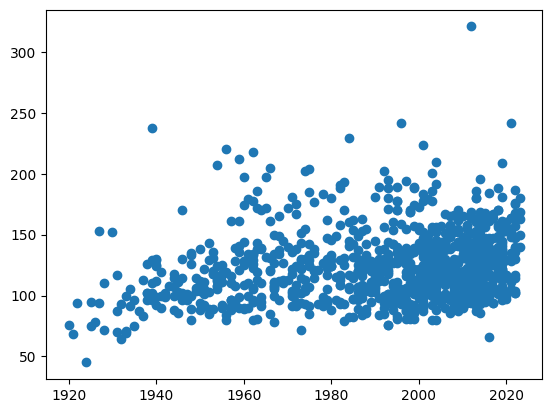

In [18]:
plt.scatter(df.Year_of_Release, df.Watch_Time)
plt.show()

In [19]:
def Lossfunction(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]['Year_of_Release']
        y = points.ilocl[i]['Watch_Time']
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

In [20]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i]['Year_of_Release']
        y = points.iloc[i]['Watch_Time']
        
        m_gradient += - (2 / n) * x * (y - (m_now * x + b_now)) 
        b_gradient += - (2 / n) * (y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [21]:
m = 0
b = 0
L = 0.0000001
epochs = 850

In [22]:
for i in range(epochs):
    if i % 50 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, df, L)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600
Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800


0.06241390892449705 2.2036916071865304e-05


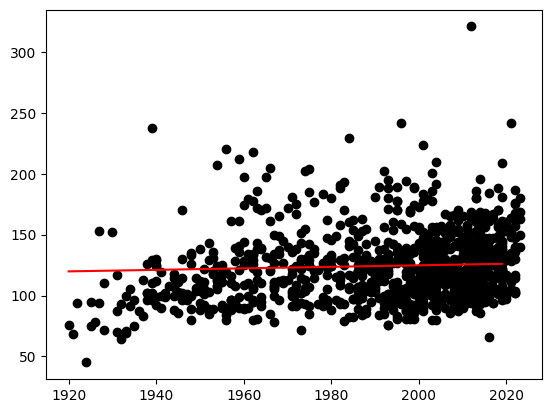

In [23]:
print(m, b)
plt.scatter(df.Year_of_Release, df.Watch_Time, color="black")
plt.plot(list(range(1920, 2020)), [m * x + b for x in range(1920, 2020)], color="red")
plt.show()

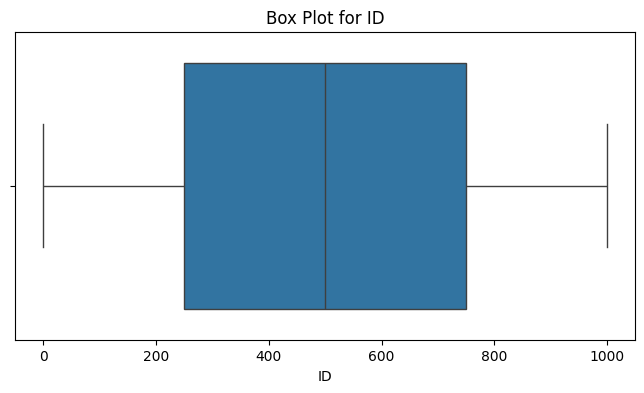

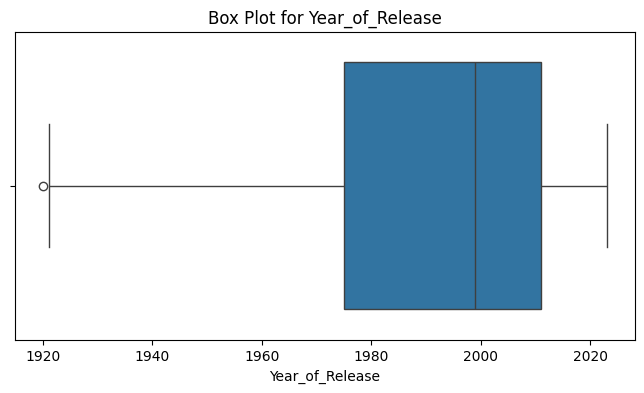

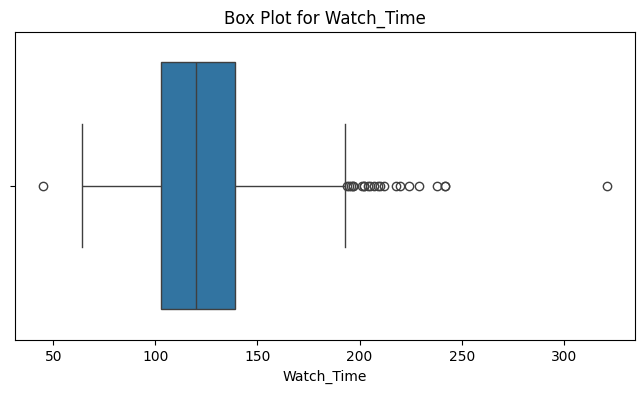

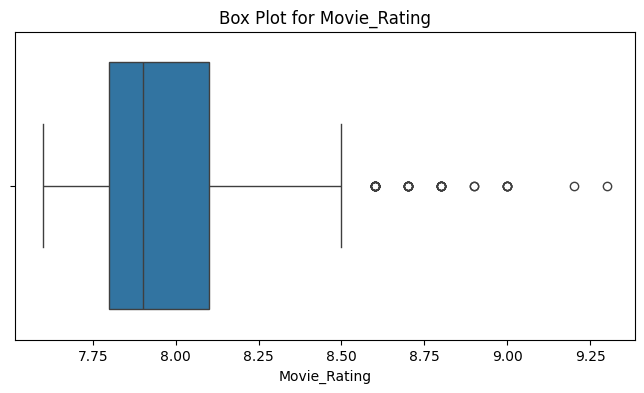

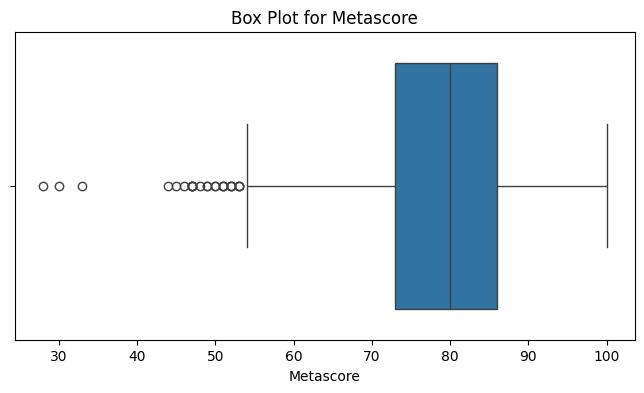

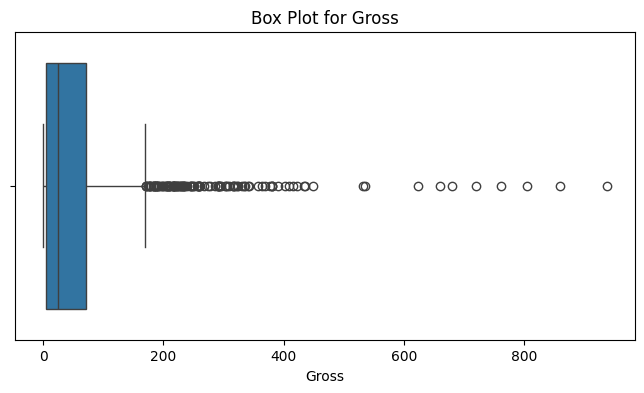

In [24]:
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

<Axes: >

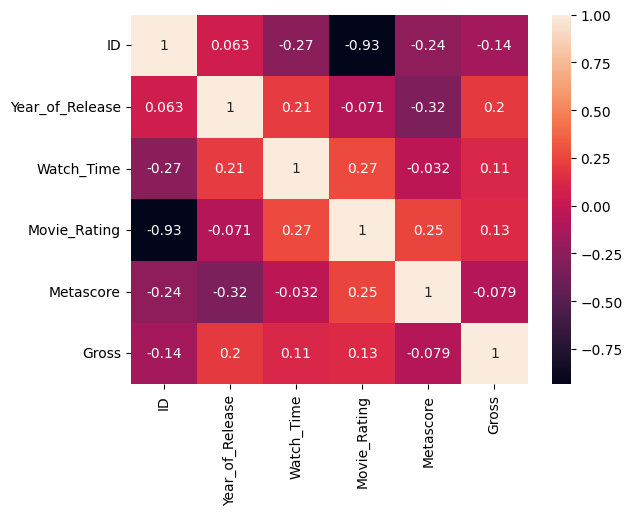

In [25]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)